# Titanic Analysis + Modeling
- ML Applications : Classification, Deep Learning

### Read in Dataset

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [156]:
import pandas as pd
titanic_df = pd.read_csv('/Users/sandeepk/Desktop/Ex_Files_Machine_Learning_Algorithms/Exercise Files/titanic.csv')

In [157]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [158]:
#null value count
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
#impute missing age values with mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [160]:
#Create family column
titanic_df['Family_cnt'] = (lambda x,y: (x+y))(titanic_df['SibSp'],titanic_df['Parch'])

In [164]:
#Drop unneccessary vars
try:
    titanic_df.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
    titanic_df.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'Sex'], axis=1, inplace=True)
except KeyError:
    print(True)

In [161]:
#Sex to numeric
mapped_vars = {'male': 0, 'female': 1}
titanic_df['Gender'] = titanic_df['Sex'].map(mapped_vars)

In [165]:
titanic_df.head(3)

,Survived,Pclass,Age,Fare,Family_cnt,Gender
0,0,3,22.0,7.2500,1,0
1,1,1,38.0,71.2833,1,1
2,1,3,26.0,7.9250,0,1


### Descriptive Analytics

<Figure size 432x288 with 0 Axes>

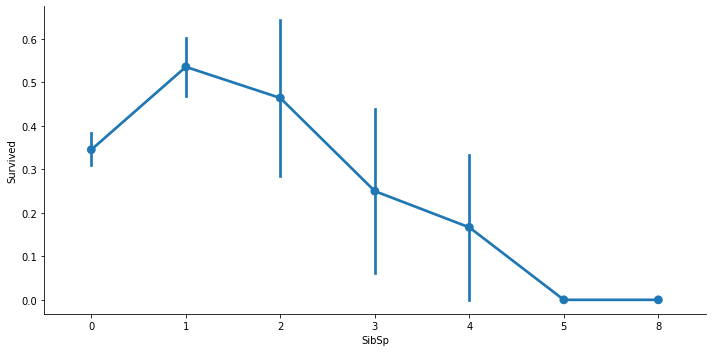

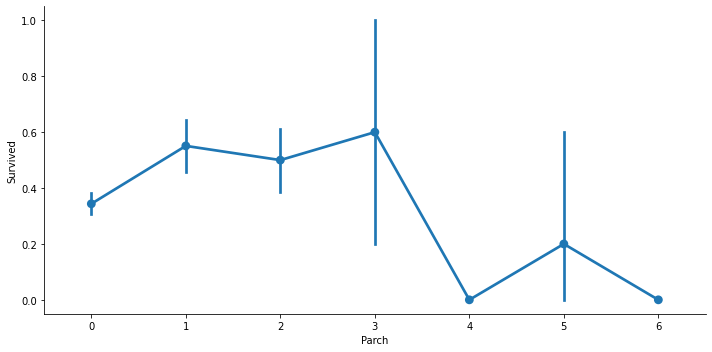

In [163]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic_df, kind='point', aspect=2, )

In [166]:
titanic_df.groupby('Pclass').agg({'Survived': 'count'})
#Make histogram

,Survived
Pclass,
1,216
2,184
3,491


## Split Dataset into Training and Testing Features
 - .6/.2/.2 Train, Test, Validation split


In [157]:
titanic_df.head(3)

,Survived,Pclass,Age,Fare,Family_cnt,Gender
0,0,3,22.0,7.2500,1,0
1,1,1,38.0,71.2833,1,1
2,1,3,26.0,7.9250,0,1


In [167]:
#initiate Xn..,Y features
features = titanic_df.drop('Survived', axis=1)
labels = titanic_df['Survived']

In [168]:
#SPLIT DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [169]:
#Confirm Split Parameters
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [156]:
#Coding_Interview - LONGEST PALINDROME
class Palindrome():
    def __init__(self):
        pass
    
    def longest_pal(self, s):        
        return_ls = []
        for val in range(len(s)):
            for val1 in range(val+1, len(s)):
                if s[val:val1+1:1] == s[val1::-1]:
                    return_ls.append(s[val:val1+1:1])   
        return return_ls[0]

p = Palindrome()
p.longest_pal('babal')

'bab'

## Logistic Regression
- HyperParameter tuning

In [170]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 

In [171]:
log_r = LogisticRegression()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

cv = GridSearchCV(log_r, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [172]:
cv.best_estimator_

LogisticRegression(C=1)

In [173]:
print(cv.cv_results_)

{'mean_fit_time': array([0.00986476, 0.00685439, 0.00716834, 0.00734844, 0.00768018,
       0.00778098, 0.00806594]), 'std_fit_time': array([0.00759574, 0.00038269, 0.00038213, 0.00059565, 0.0003031 ,
       0.00059853, 0.00093837]), 'mean_score_time': array([0.00116477, 0.00102224, 0.00101662, 0.0010181 , 0.00105143,
       0.0010191 , 0.00101252]), 'std_score_time': array([1.75814173e-04, 1.74346429e-05, 1.08190558e-05, 9.97763950e-06,
       9.09737319e-05, 1.38984740e-05, 1.25303878e-05]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.69158879, 0.77570093, 0.86915888, 0.87850467, 0.86915888,
       0.86915888, 0.86915888]), 'split1_test_score': array([0.71028037, 0.74766355, 0.82242991, 0.82242991, 0.82242991,
       0.

In [213]:
print(cv.cv_results_['params'])
print()
print(cv.cv_results_['mean_test_score'])
print()
print(cv.cv_results_['std_test_score'])

[{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}]

[0.6704285  0.709769   0.78661612 0.80532534 0.79971786 0.7978487
 0.7978487 ]

[0.038332   0.05368189 0.07534359 0.05751563 0.05963584 0.0619264
 0.0619264 ]


In [210]:
# find average score/sd for the k-fold cross validation of each set/mix of parameters 
def print_results(gridsearch):
    print('BEST PARAMS: {}\n'.format(gridsearch.best_params_))
    [print(f'{mean_test:.2f} +/-{std:.2f} for {params}')\
     for params, mean_test, std in zip(gridsearch.cv_results_['params'], \
                                       gridsearch.cv_results_['mean_test_score'], \
                                       gridsearch.cv_results_['std_test_score'])][0]

In [211]:
print_results(cv)

BEST PARAMS: {'C': 1}

0.67 +/-0.04 for {'C': 0.001}
0.71 +/-0.05 for {'C': 0.01}
0.79 +/-0.08 for {'C': 0.1}
0.81 +/-0.06 for {'C': 1}
0.80 +/-0.06 for {'C': 10}
0.80 +/-0.06 for {'C': 100}
0.80 +/-0.06 for {'C': 1000}


In [174]:
#A Way to view scored of one set of CV with determined parameters for a model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_r, features, labels, cv=5)
round(np.mean(scores),2)

0.79

In [179]:
#Instantiate and fit model with the optimized parameters
lr_titanic = LogisticRegression(C=1).fit(X_train,y_train)

In [180]:
y_pred = lr_titanic .predict(X_test)

y_pred_train = lr_titanic .predict(X_train)

from sklearn import metrics

print ('Accuracy on Test Data:', metrics.accuracy_score(y_test, y_pred))
print ('Accuracy on Train Data:', metrics.accuracy_score(y_train, y_pred_train))

Accuracy on Test Data: 0.8156424581005587
Accuracy on Train Data: 0.8089887640449438


# Store Data

In [47]:
import pandas as pd
store_df = pd.read_csv('/Users/sandeepk/Desktop/Sales_History_Feb_09,_2023.csv')

In [48]:
store_df['Name']

0                                             The money 
1                                               Atm fee 
2                               New Amsterdan Vodka 50ml
3                                    Year oF the Raddit 
4      Marlboro Filter Cigarettes Gold Pack 100`s 1.0...
                             ...                        
284                                             10.LOTTO
285                                            05.LIQUOR
286                                           13.TOBACCO
287                                       06.Non Taxable
288                                           07.TAXABLE
Name: Name, Length: 289, dtype: object

In [44]:
string = 'Marlboro you'
cigs = ['Marlboro', 'Camel', 'Swisher', 'NewPort', 'Zig-Zag']
alcohol = ['Year', '99pink', 'Seneca', 'Hurricane', 'Firebal', 'Lagunitas', '99', 'Pabst',
          "Mike's", 'JOSE', 'Natural', 'Taaka', 'Miller']
for val, val2 in zip(cigs, alcohol):
    if string.startswith(val):
        print('yes')

yes


In [100]:
alcohol = ('Year', '99', 'Seneca', 'Hurricane', 'Firebal', 'Lagunitas', '99', 'Pabst',
          "Mike's", 'JOSE', 'Natural', 'Taaka', 'Miller', 'King', 'Bud', 'Mickeys', 'Coors',
          'Steel', 'NEW VOODOO', 'Truly', 'Earthquake', 'Crow', 'Grey', 'Buzzballz', 'E&J', 'Sutter',
          'BUZZBALL', 'New', 'Venon', 'Canada', 'Seagram', 'POPOV', 'Whiteclaw', 'Remy', '805',
          'Hennessy', 'Guardians', 'Modelo' 'Mississippi', 'Smirnoff', 'Miller', 'Olde', 'Cut', 'Jim')

#ML is ok and #pk
cigs = ('Marlboro', 'Camel', 'Swisher', 'NewPort', 'Zig-Zag', 'Carlton', 'Backwoods', 'American',
       'DUTCH', 'Remington', 'VUSE', 'Black', 'Maverick', 'Heineken', 'Elf')

snacks = ('Red Bull', 'Mentos', 'Starbucks', 'Rockstar', 'Coca-Cola', 'Dr Pepper', 'bang', 'Kit Kat',
         "Reese's", "Keebler", 'Tropicana', 'Pepsi', 'Gator', 'Redbull', 'Rockstor', 'Pringles',
         'Life', 'Fride', 'Yup', 'Pop', 'Lipton', 'Nestle', 'Vitamin', 'Glaceu', 'Body', 'Sweet',
         'Monster', 'Munchies', 'Cheetos', 'Fritos', '3', 'El', 'Micho', 'Slim', 'Country', 'Fruit', 'Fanta')


In [101]:
alcohol, cigs, snacks = [val.lower() for val in alcohol], [val.lower() for val in cigs], \
[val.lower() for val in snacks]

In [102]:
alcohol, cigs, snacks = [val.lower() for val in alcohol], [val.lower() for val in cigs], \
[val.lower() for val in snacks]
alcohol, cigs, snacks = tuple(alcohol), tuple(cigs), tuple(snacks)

In [104]:
new_col = []
#1=alcohol
#2=cigs
#3=non-alchol products
#0-other

for row in store_df['Name']:
    if row.lower().startswith(alcohol) or row.lower().endswith('ml'):
        new_col.append(1)
    elif row.lower().startswith(cigs):
        new_col.append(2)
    elif row.lower().startswith(snacks):
        new_col.append(3)
    else:
        new_col.append(0)
            


In [106]:
len(new_col)
store_df.shape

(289, 4)

In [117]:
import numpy as np
store_df['Class'] = new_col

conditions = [
    (store_df["Class"] == 0),
    (store_df["Class"] == 1),
    (store_df["Class"] == 2),
    (store_df["Class"] == 3)

]

values = ['Other', 'Alcohol', 'Cigarettes/Vapes', 'Non-alcoholic bev&snacks'
]
    
store_df['Type'] = np.select(conditions,values)

In [119]:
agg = store_df.groupby('Type').agg({'Total Qty': 'sum'})
agg

,Total Qty
Type,
Alcohol,226
Cigarettes/Vapes,123
Non-alcoholic bev&snacks,97
Other,251


In [124]:
list(agg.index)

['Alcohol', 'Cigarettes/Vapes', 'Non-alcoholic bev&snacks', 'Other']

<AxesSubplot:xlabel='Type', ylabel='Total Qty'>

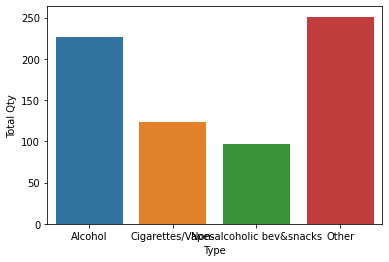

In [125]:
import seaborn as sns
sns.barplot(data=agg, x=agg.index, y='Total Qty')


In [134]:
store_df[store_df['Type'] == 'Other'].sort_values(by='Total Amount', ascending=False)

,UPC,Name,Total Qty,Total Amount,Class,Type
0,7.359754e+11,The money,35,70.00,0,Other
94,7.359753e+11,100x,2,40.00,0,Other
284,NaN,10.LOTTO,6,28.00,0,Other
101,2.610001e+10,True F Box 1.00 PK,2,27.35,0,Other
241,6.116401e+11,Czrto,1,21.54,0,Other
...,...,...,...,...,...,...
167,8.123190e+11,Good Times 3pk 3 pk,1,1.07,0,Other
201,8.404391e+11,Zage wraps,1,1.07,0,Other
175,6.130087e+11,Arizona: Raspberry Iced Tea 23 Oz,1,1.04,0,Other
252,3.485603e+10,"Welch's Fruit Snack, Mixed Fruit 2.25 OZ",1,0.99,0,Other
